         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

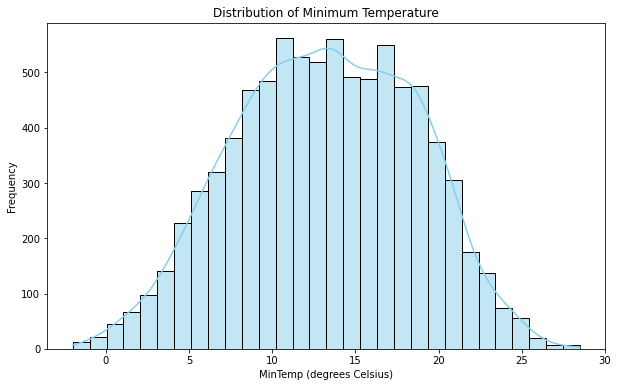

        Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  Humidity3pm  \
0          W        WNW          20.0  ...         71.0         22.0   
1        NNW        WSW           4.0  ...         44.0         25.0   
2          W        WSW          19.0  ...         38.0         30.0   
3         SE          E          11.0  ...         45.0         16.0   
4        ENE         NW           7.0  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0     

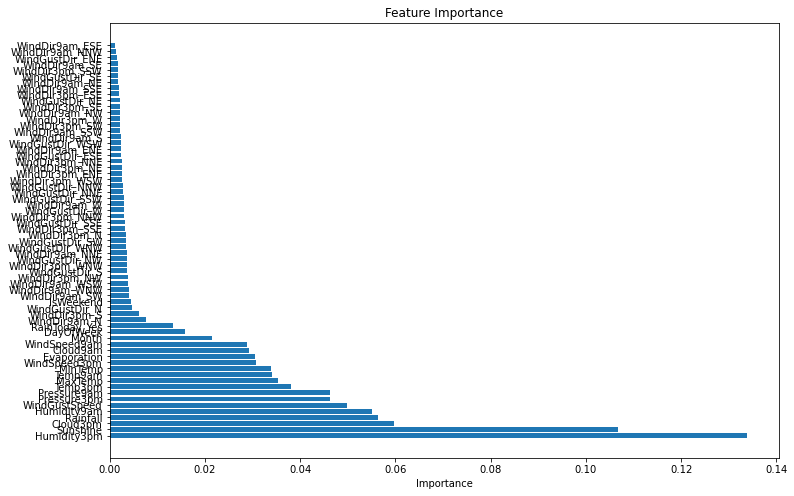

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
df = pd.read_csv(url)
print(df.head())
print(df.info())
missing_values = df.isnull().sum()
threshold = 0.3
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)
print(df.describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['MinTemp'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Minimum Temperature')
plt.xlabel('MinTemp (degrees Celsius)')
plt.ylabel('Frequency')
plt.show()
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df.head())
numerical_columns = df.select_dtypes(include=['float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
categorical_columns = ['RainTomorrow']
df.dropna(subset=categorical_columns, inplace=True)
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
print(df.head())
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
df.drop(['Date', 'Location'], axis=1, inplace=True)
df.dropna(inplace=True)
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
best_rf_clf = grid_search.best_estimator_
y_pred_best = best_rf_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
print("\nModel Performance after Hyperparameter Tuning:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
df.drop(['Date', 'Location'], axis=1, inplace=True)
df.dropna(inplace=True)
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)
feature_importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
import pandas as pd
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
df = pd.read_csv(url)
print("Dataset Information:")
print(df.info())
print("\nFirst Few Rows of the Dataset:")
print(df.head())
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
df = pd.read_csv(url)
rainfall_columns = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                    'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 
                    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
                    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

df_rainfall = df[rainfall_columns]
imputer = SimpleImputer(strategy='mean')
df_rainfall['Rainfall'] = imputer.fit_transform(df_rainfall[['Rainfall']]).ravel()
label_encoder = LabelEncoder()
df_rainfall['RainToday'] = label_encoder.fit_transform(df_rainfall['RainToday'])
df_rainfall['RainTomorrow'] = label_encoder.fit_transform(df_rainfall['RainTomorrow'])
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df_rainfall = pd.get_dummies(df_rainfall, columns=categorical_columns, drop_first=True)
print("Modified Dataset:")
print(df_rainfall.head())
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
df = pd.read_csv(url)
rainfall_columns = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                    'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 
                    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
                    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

df_rainfall = df[rainfall_columns]
imputer = SimpleImputer(strategy='mean')
df_rainfall['Rainfall'] = imputer.fit_transform(df_rainfall[['Rainfall']]).ravel()
label_encoder = LabelEncoder()
df_rainfall['RainToday'] = label_encoder.fit_transform(df_rainfall['RainToday'])
df_rainfall['RainTomorrow'] = label_encoder.fit_transform(df_rainfall['RainTomorrow'])
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df_rainfall = pd.get_dummies(df_rainfall, columns=categorical_columns, drop_first=True)
df_rainfall['Month'] = pd.to_datetime(df_rainfall['Date']).dt.month
df_rainfall['DayOfWeek'] = pd.to_datetime(df_rainfall['Date']).dt.dayofweek
df_rainfall['Humidity_Diff'] = df_rainfall['Humidity3pm'] - df_rainfall['Humidity9am']
df_rainfall['Temp_Diff'] = df_rainfall['Temp3pm'] - df_rainfall['Temp9am']
df_rainfall = df_rainfall.dropna()
X = df_rainfall.drop(['Date', 'Location', 'Rainfall'], axis=1)
y = df_rainfall['Rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance:")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


In [ ]:
Insurance Claim Fraud Detection
Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported

Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


In [ ]:
import pandas as pd
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)
print(df.head())
print("Missing Values:\n", df.isnull().sum())
df = df.dropna()
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df_encoded = pd.get_dummies(df, columns=['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
                                         'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type',
                                         'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
                                         'property_damage', 'police_report_available', 'auto_make', 'auto_model'])

print(df_encoded.head())
import matplotlib.pyplot as plt
import seaborn as sns
print("Statistical Analysis of Numerical Features:\n", df_encoded.describe())
df_encoded.hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02, size=16)
plt.show()
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_encoded, orient="h")
plt.title('Box Plots of Numerical Features')
plt.show()
sns.pairplot(df_encoded, hue='fraud_reported', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features with Fraud Reported', y=1.02, size=16)
plt.show()
plt.figure(figsize=(15, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print("Column Names:\n", df_encoded.columns)
correlation_with_target = df_encoded.corr()['fraud_reported'].sort_values(ascending=False)
print("Correlation with Target ('fraud_reported'):\n", correlation_with_target)
correlation_threshold = 0.1  
selected_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index.tolist()
selected_features.remove('fraud_reported')
print("\nSelected Features:\n", selected_features)
df_selected_features = df_encoded[selected_features + ['fraud_reported']]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X = df_selected_features.drop('fraud_reported', axis=1)
y = df_selected_features['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print("\nTuned Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_tuned))
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()



In [ ]:
Zomato Restaurant
Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
zomato_data = pd.read_csv("D:\\Intern projects\\zomato.csv", encoding='ISO-8859-1')
country_code = pd.read_excel("D:\\Intern projects\\Country-Code.xlsx")
zomato_data.rename(columns={'Country Code': 'Country code'}, inplace=True)
merged_data = pd.merge(zomato_data, country_code, how='left', left_on='Country code', right_on='Country code')
merged_data.drop(['Country Code'], axis=1, inplace=True)
merged_data.dropna(inplace=True)
X_cost = merged_data[['Aggregate rating', 'Votes', 'Price range']]
X_price_range = merged_data[['Aggregate rating', 'Votes', 'Average Cost for two']]
y_cost = merged_data['Average Cost for two']
y_price_range = merged_data['Price range']
X_cost_train, X_cost_test, y_cost_train, y_cost_test = train_test_split(X_cost, y_cost, test_size=0.2, random_state=42)
X_price_range_train, X_price_range_test, y_price_range_train, y_price_range_test = train_test_split(X_price_range, y_price_range, test_size=0.2, random_state=42)
model_cost = LinearRegression()
model_cost.fit(X_cost_train, y_cost_train)
model_price_range = LinearRegression()
model_price_range.fit(X_price_range_train, y_price_range_train)
y_cost_pred = model_cost.predict(X_cost_test)
y_price_range_pred = model_price_range.predict(X_price_range_test)
mse_cost = mean_squared_error(y_cost_test, y_cost_pred)
print(f'Mean Squared Error for Average Cost for two: {mse_cost}')
mse_price_range = mean_squared_error(y_price_range_test, y_price_range_pred)
print(f'Mean Squared Error for Price range: {mse_price_range}')
